In [2]:
%gui wx

Opening raw data file /home/fernando/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


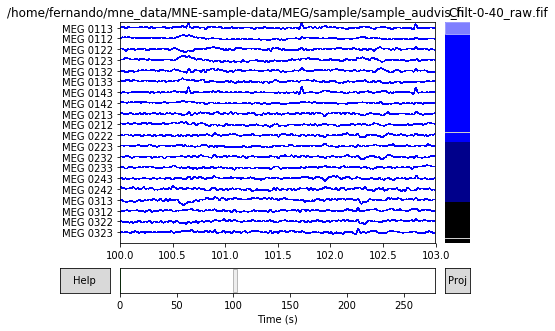

Setting up low-pass filter at 40 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 99 samples (0.659 sec) selected
319 events found
Events id: [ 1  2  3  4  5 32]
72 matching events found
Created an SSP operator (subspace dimension = 4)
4 projection items activated
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on MAG : [u'MEG 1711']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u

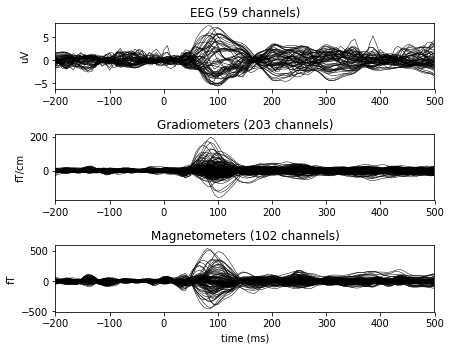

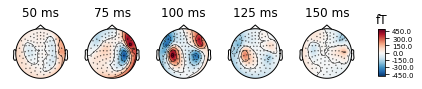

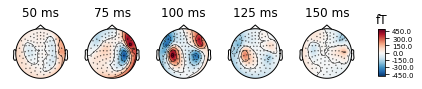

In [3]:
# http://www.martinos.org/mne/stable/index.html
# http://www.martinos.org/mne/stable/auto_examples/index.html
# http://www.martinos.org/mne/stable/auto_examples/index.html#real-time-m-eeg-acquisition
import os
import mne
from mne.minimum_norm import (make_inverse_operator, apply_inverse,
                              write_inverse_operator)
# accessing datasets
from mne.datasets import sample
import numpy as np
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
os.environ["SUBJECTS_DIR"] = data_path + '/subjects'
raw = mne.io.read_raw_fif(raw_fname, preload=True)
raw.plot(duration=3, start=100)
# plt.show()
raw.filter(l_freq=None, h_freq=40.0) # low pass filter
raw.info['bads'] = ['MEG 2443', 'EEG 053'] # mark bad channels if you know them
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True, exclude='bads')
events = mne.find_events(raw, stim_channel='STI 014') # extract any event default is when values increase and epoch data
epochs = mne.Epochs(raw, events, event_id=1, tmin=-0.2, tmax=0.5, baseline = (None, 0), reject=dict(grad=4000e-13, mag=4e-12, eog=150e-6))
evoked = epochs.average() # compute evoked
evoked.plot()
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag')

In [1]:
noise_cov = mne.compute_covariance(
    epochs, tmax=0., method=['shrunk', 'empirical'])

fname_fwd = data_path + '/MEG/sample/sample_audvis-meg-oct-6-fwd.fif'
fwd = mne.read_forward_solution(fname_fwd, surf_ori=True)

# Restrict forward solution as necessary for MEG
fwd = mne.pick_types_forward(fwd, meg=True, eeg=False)

# make an M/EEG, MEG-only, and EEG-only inverse operators
info = evoked.info
inverse_operator = make_inverse_operator(info, fwd, noise_cov,
                                         loose=0.2, depth=0.8)

write_inverse_operator('sample_audvis-meg-oct-6-inv.fif',
                       inverse_operator)

# Compute inverse solution

method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
stc = apply_inverse(evoked, inverse_operator, lambda2,
                    method=method, pick_ori=None)


# visualize

subjects_dir = data_path + '/subjects'
brain = stc.plot(surface='inflated', hemi='rh', subjects_dir=subjects_dir)
brain.set_data_time_index(45)
brain.scale_data_colormap(fmin=8, fmid=12, fmax=15, transparent=True)
brain.show_view('lateral')

# morph data to average brain
stc_fsaverage = stc.morph(subject_to='fsaverage', subjects_dir=subjects_dir)

brain_fsaverage = stc_fsaverage.plot(surface='inflated', hemi='rh',
                                     subjects_dir=subjects_dir)
brain_fsaverage.set_data_time_index(45)
brain_fsaverage.scale_data_colormap(fmin=8, fmid=12, fmax=15, transparent=True)
brain_fsaverage.show_view('lateral')

NameError: name 'mne' is not defined